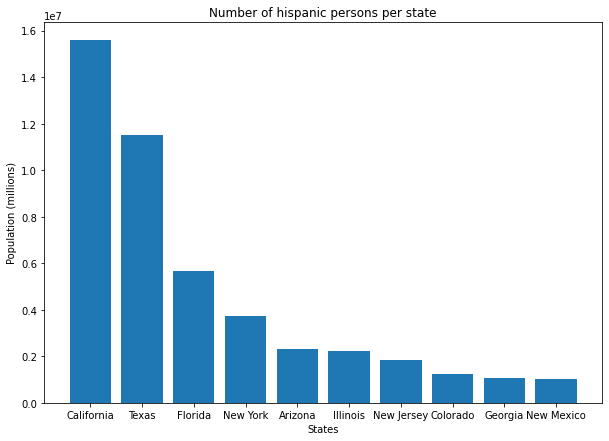

In [15]:
import requests #Here is the work from the slides for the day (Homework/lab is below)
import json
import csv 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

API_Key = "4cef89ac9d2e20ea960c5f0ee03a5816a3695476"
url = f"https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&HISP=2&for=state:*&key={API_Key}"

census_data = requests.get(url)
json_file = census_data.json()

data_file = open("census_data.csv", "w", newline="", encoding="utf8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["Name","Pop","Hisp-ID","State"])

for i in json_file:
    if i == json_file[0]:
        pass
    else:
        Name = i[0]
        Pop = i[1]
        Hisp = i[2]
        State = i[3]
    csv_writer.writerow([Name,Pop,Hisp,State])
    
data_file.close()
sheet = pd.read_csv("census_data.csv")
sheet = sheet.sort_values(by="Pop",ascending = False)


df = pd.DataFrame(sheet)

name = df["Name"]
pop = df["Pop"]

fig = plt.figure(figsize = (10,7))
plt.bar(name[0:10], pop[0:10])

plt.xlabel("States")
plt.ylabel("Population (millions)")
plt.title("Number of hispanic persons per state")

plt.show()

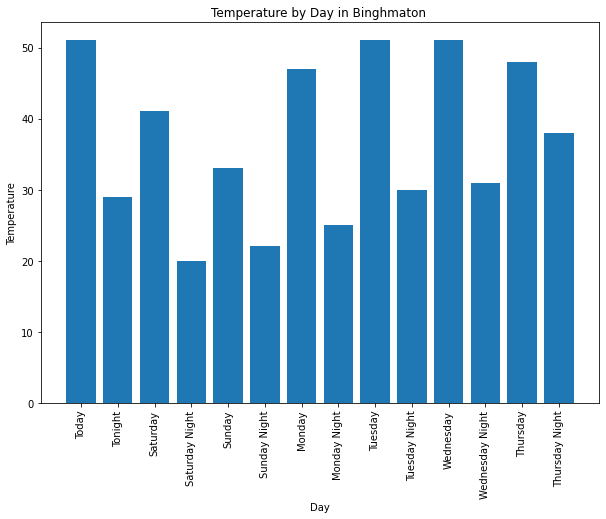

In [115]:
#Start of Homework Here
import requests
import json

lat = "42.0987"
lon = "-75.9180"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
forecast = json_file["properties"]["forecast"]
newrequest = requests.get(forecast)
json = newrequest.json()
a = json["properties"]["periods"]

data_file = open("weather_data.csv", "w", newline="", encoding="utf8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["Day","Temp","Description"])

for i in a:
    name=i["name"]
    temp=i["temperature"]
    detail=i["detailedForecast"]
    csv_writer.writerow([name,temp,detail])
data_file.close()
weather = pd.read_csv("weather_data.csv")

df = pd.DataFrame(weather)

name = df["Day"]
pop = df["Temp"]

fig = plt.figure(figsize = (10,7))
plt.bar(name, pop)

plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title("Temperature by Day in Binghmaton ")

plt.tick_params(axis='x', labelrotation = 90) #Bonus here - https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

plt.show()

In [32]:
# 1. This accesses data on the country 
country = requests.get(f"https://date.nager.at/api/v3/CountryInfo/{54}")
country.json()

{'commonName': 'Ivory Coast',
 'officialName': "Republic of Côte d'Ivoire",
 'countryCode': 'CI',
 'region': 'Africa',
 'borders': [{'commonName': 'Burkina Faso',
   'officialName': 'Burkina Faso',
   'countryCode': 'BF',
   'region': 'Africa',
   'borders': None},
  {'commonName': 'Ghana',
   'officialName': 'Republic of Ghana',
   'countryCode': 'GH',
   'region': 'Africa',
   'borders': None},
  {'commonName': 'Guinea',
   'officialName': 'Republic of Guinea',
   'countryCode': 'GN',
   'region': 'Africa',
   'borders': None},
  {'commonName': 'Liberia',
   'officialName': 'Republic of Liberia',
   'countryCode': 'LR',
   'region': 'Africa',
   'borders': None},
  {'commonName': 'Mali',
   'officialName': 'Republic of Mali',
   'countryCode': 'ML',
   'region': 'Africa',
   'borders': None}]}

In [33]:
# 2. This shows all available countries 
all_countries = requests.get("https://date.nager.at/api/v3/AvailableCountries")
all_countries.json()

[{'countryCode': 'AD', 'name': 'Andorra'},
 {'countryCode': 'AL', 'name': 'Albania'},
 {'countryCode': 'AR', 'name': 'Argentina'},
 {'countryCode': 'AT', 'name': 'Austria'},
 {'countryCode': 'AU', 'name': 'Australia'},
 {'countryCode': 'AX', 'name': 'Åland Islands'},
 {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'},
 {'countryCode': 'BB', 'name': 'Barbados'},
 {'countryCode': 'BE', 'name': 'Belgium'},
 {'countryCode': 'BG', 'name': 'Bulgaria'},
 {'countryCode': 'BJ', 'name': 'Benin'},
 {'countryCode': 'BO', 'name': 'Bolivia'},
 {'countryCode': 'BR', 'name': 'Brazil'},
 {'countryCode': 'BS', 'name': 'Bahamas'},
 {'countryCode': 'BW', 'name': 'Botswana'},
 {'countryCode': 'BY', 'name': 'Belarus'},
 {'countryCode': 'BZ', 'name': 'Belize'},
 {'countryCode': 'CA', 'name': 'Canada'},
 {'countryCode': 'CH', 'name': 'Switzerland'},
 {'countryCode': 'CL', 'name': 'Chile'},
 {'countryCode': 'CN', 'name': 'China'},
 {'countryCode': 'CO', 'name': 'Colombia'},
 {'countryCode': 'CR', 'name':

In [35]:
# 3. This shows all the long weekends in a specific country in a specific year
long_weekends = requests.get(f"https://date.nager.at/api/v3/LongWeekend/{2020}/{54}")
long_weekends.json()

[{'startDate': '2020-01-04',
  'endDate': '2020-01-06',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-02-29',
  'endDate': '2020-03-02',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-04-17',
  'endDate': '2020-04-21',
  'dayCount': 5,
  'needBridgeDay': False},
 {'startDate': '2020-05-01',
  'endDate': '2020-05-03',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-06-06',
  'endDate': '2020-06-08',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2020-10-01',
  'endDate': '2020-10-04',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2020-12-24',
  'endDate': '2020-12-27',
  'dayCount': 4,
  'needBridgeDay': False}]

In [36]:
# 4. This shows all public holidays in a specific counrty in a specific year 
public_holidays = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{2020}/{54}")
public_holidays.json()

[{'date': '2020-01-01',
  'localName': 'Πρωτοχρονιά',
  'name': "New Year's Day",
  'countryCode': 'CY',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2020-01-06',
  'localName': 'Θεοφάνεια',
  'name': 'Epiphany',
  'countryCode': 'CY',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2020-03-02',
  'localName': 'Καθαρή Δευτέρα',
  'name': 'Green Monday',
  'countryCode': 'CY',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2020-03-25',
  'localName': 'Επέτειος Ελληνικής Ανεξαρτησίας',
  'name': 'Greek Independence Day',
  'countryCode': 'CY',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2020-04-01',
  'localName': 'Κυπριακή Εθνική Επέτειος',
  'name': 'Cyprus National Day',
  'countryCode': 'CY',
  'fixed': True,
  'global': Tr

In [97]:
# 5. This checks if the current day is a public holiday 
is_holiday = requests.get(f"https://date.nager.at/api/v3/IsTodayPublicHoliday/{54}?offset=0")
print(is_holiday) #204 means that it is not a public holiday

<Response [204]>


In [46]:
# 6. This provides the upcoming holidays over the next year 
upcoming = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/{54}")
upcoming.json()

[{'date': '2023-03-25',
  'localName': 'Επέτειος Ελληνικής Ανεξαρτησίας',
  'name': 'Greek Independence Day',
  'countryCode': 'CY',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-01',
  'localName': 'Κυπριακή Εθνική Επέτειος',
  'name': 'Cyprus National Day',
  'countryCode': 'CY',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-14',
  'localName': 'Μεγάλη Παρασκευή',
  'name': 'Good Friday',
  'countryCode': 'CY',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-17',
  'localName': 'Δευτέρα της Διακαινησίμου',
  'name': 'Easter Monday',
  'countryCode': 'CY',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-18',
  'localName': 'Τρίτη της Διακαινησίμου',
  'name': 'Easter Tuesday',
  'countryCode': 'C

In [44]:
# 7. Provides the upcoming weeks worldwide holidays 
worldwide = requests.get("https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")
worldwide.json()

[{'date': '2023-03-17',
  'localName': "Saint Patrick's Day",
  'name': "Saint Patrick's Day",
  'countryCode': 'CA',
  'fixed': True,
  'global': False,
  'counties': ['CA-NL'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-17',
  'localName': "Saint Patrick's Day",
  'name': "Saint Patrick's Day",
  'countryCode': 'GB',
  'fixed': True,
  'global': False,
  'counties': ['GB-NIR'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-17',
  'localName': 'Lá Fhéile Pádraig',
  'name': "Saint Patrick's Day",
  'countryCode': 'IE',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': 1903,
  'types': ['Public']},
 {'date': '2023-03-17',
  'localName': "Saint Patrick's Day",
  'name': "Saint Patrick's Day",
  'countryCode': 'MS',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-19',
  'localName': 'Josefstag',
  'name': "Saint Joseph's Day",
  'countryCode': 'CH',
  'fix

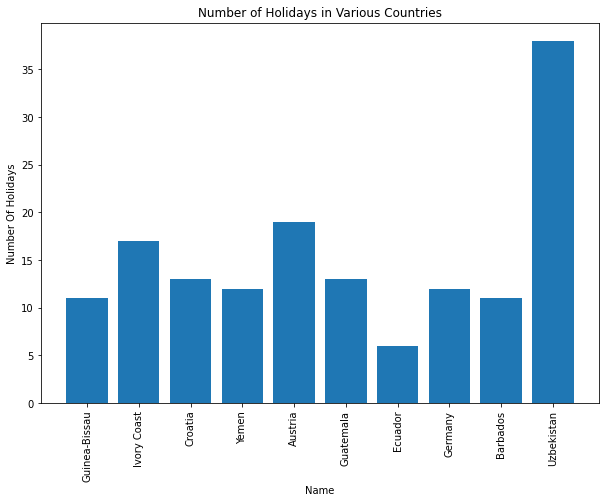

,Name,Number of Holidays
0,Guinea-Bissau,11
1,Ivory Coast,17
2,Croatia,13
3,Yemen,12
4,Austria,19
5,Guatemala,13
6,Ecuador,6
7,Germany,12
8,Barbados,11
9,Uzbekistan,38


In [116]:
country_file = open("country_data.csv", "w", newline="", encoding="utf8")
csv_writer = csv.writer(country_file)
csv_writer.writerow(["Name","Number of Holidays"])
code = (93,54,55,246,14,90,64,82,19,237)
for i in code:
    public_holidays = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2023/{i}")
    country_name = requests.get(f"https://date.nager.at/api/v3/CountryInfo/{i}")
    holiday_json = public_holidays.json()
    country_json = country_name.json()
    Name = country_json["commonName"]
    Holidays = len(holiday_json)
    csv_writer.writerow([Name,Holidays])
country_file.close()
country = pd.read_csv("country_data.csv")
#Bonus starts here
df = pd.DataFrame(country)

name = df["Name"]
number = df["Number of Holidays"]

fig = plt.figure(figsize = (10,7))
plt.bar(name, number)

plt.xlabel("Name")
plt.ylabel("Number Of Holidays")
plt.title("Number of Holidays in Various Countries")

plt.tick_params(axis='x', labelrotation = 90)

plt.show()
country